<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

<br><br>
## <strong>1 금융 시계열 데이터 결측치 처리 / 보간법
https://github.com/pydata/pandas-datareader
1. pandas를 활용한 데이터 정렬 및 보간법
1. 금융데이터 크롤링 모듈 설치방법 (2018.06 기준)
1. ! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade

In [1]:
# from pandas_datareader import get_data_yahoo
# start_date = '2013-01-01'
# codes = ['KO', 'MS', '005930.KS', '000660.KS']
# result = {}
# for code in codes:
#     result[code] = get_data_yahoo(code, start_date).Close

# import pandas as pd
# prices = pd.DataFrame(result)

# prices = prices.fillna(method='ffill')
# prices = prices.dropna()                
# prices.to_csv('./data/stocks.csv', encoding="ms949")
# prices.tail(3)

In [2]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
prices = pd.read_csv('./data/stocks.csv')
prices = prices.set_index('Date')
prices.head(3)
prices.index = pd.DatetimeIndex(prices.index)
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1410 entries, 2013-01-02 to 2018-06-11
Data columns (total 4 columns):
KO           1410 non-null float64
MS           1410 non-null float64
005930.KS    1410 non-null float64
000660.KS    1410 non-null float64
dtypes: float64(4)
memory usage: 55.1 KB


<br><br>
## **2 금융 시계열 데이터 전처리**
데이터 분석을 위한 전처리 방법

<br>
### **01 가격 차이가 큰 시계열 데이터 비교하기**
데이터 정규화 / 비정규화

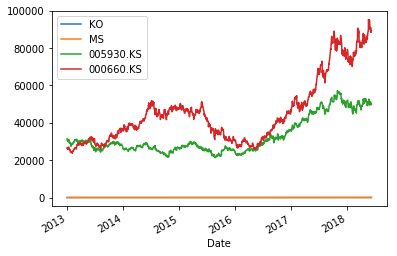

In [3]:
%matplotlib inline
prices.plot()

In [4]:
price = prices['005930.KS']
price[-5:]

Date
2018-06-05    51300.0
2018-06-06    51300.0
2018-06-07    50600.0
2018-06-08    49650.0
2018-06-11    49900.0
Name: 005930.KS, dtype: float64

In [5]:
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07',
               '2018-06-08', '2018-06-11'],
              dtype='datetime64[ns]', name='Date', length=1410, freq=None)

In [6]:
price.index = pd.DatetimeIndex(price.index)
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07',
               '2018-06-08', '2018-06-11'],
              dtype='datetime64[ns]', name='Date', length=1410, freq=None)

In [7]:
price["2013-10-03"] / price["2013-08-01"] -1

0.10781250000000009

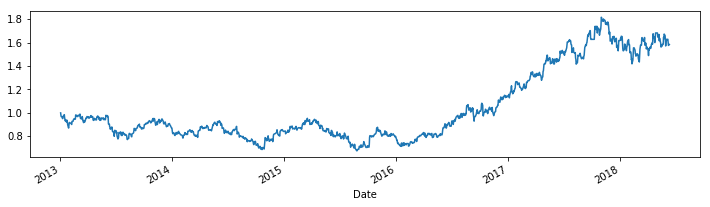

In [8]:
returns      = price.pct_change()
ret_price    = (1 + returns).cumprod()
ret_price[0] = 1

%matplotlib inline
ret_price.plot(figsize=(12,3))

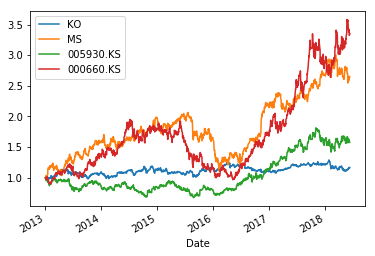

In [9]:
for col in prices.columns:
    pct_returns = prices[col].pct_change()
    pct_returns = (1 + pct_returns).cumprod()
    pct_returns[0] = 1
    pct_returns.plot(legend=True)

<br>
### **02 누적 수익률 계산 **
.pct_change().cumprod()

In [10]:
month_returns = price.resample('BM').last().pct_change()
month_returns['2016']

Date
2016-01-29   -0.087302
2016-02-29    0.024348
2016-03-31    0.113752
2016-04-29   -0.051067
2016-05-31    0.037751
2016-06-30    0.102941
2016-07-29    0.080000
2016-08-31    0.052632
2016-09-30   -0.013580
2016-10-31    0.025657
2016-11-30    0.065284
2016-12-30    0.032073
Freq: BM, Name: 005930.KS, dtype: float64

In [11]:
m_ret = (1 + month_returns).cumprod()
m_ret['2016']

Date
2016-01-29    0.794199
2016-02-29    0.813536
2016-03-31    0.906077
2016-04-29    0.859807
2016-05-31    0.892265
2016-06-30    0.984116
2016-07-29    1.062845
2016-08-31    1.118785
2016-09-30    1.103591
2016-10-31    1.131906
2016-11-30    1.205801
2016-12-30    1.244475
Freq: BM, Name: 005930.KS, dtype: float64

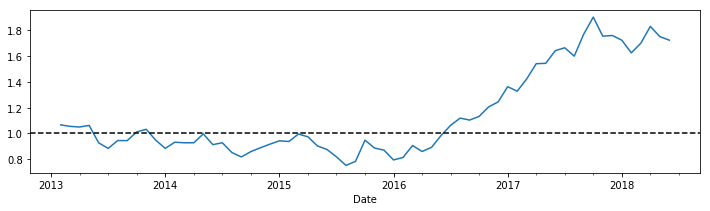

In [12]:
import matplotlib.pyplot as plt
m_ret.plot(figsize=(12,3))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
### **03 중간 배당데이터 추가하기**
재귀적 연산

In [13]:
month_returns['2016-03-31'] += 0.003

In [14]:
for i in range(4):
    i += 10000
    print(i)

10000
10001
10002
10003


<br><br>
## **3 금융데이터  분석**
pandas를 활용한 금융데이터 분석

<br>
### **01 Introduction**

In [15]:
prices.head(3)

,KO,MS,005930.KS,000660.KS
Date,,,,
2013-01-02,37.599998,19.620001,31520.0,26600.0
2013-01-03,37.599998,19.580000,30860.0,26650.0
2013-01-04,37.660000,20.190001,30500.0,26350.0


In [16]:
prices.describe()

,KO,MS,005930.KS,000660.KS
count,1410.000000,1410.000000,1410.000000,1410.000000
mean,42.100099,35.681879,32640.000000,45578.581560
std,2.407227,9.298308,9609.622299,17468.595733
min,36.840000,19.580000,21340.000000,23700.000000
25%,40.509998,28.882501,25840.000000,31800.000000
50%,41.990002,33.555000,28560.000000,41850.000000
75%,43.787500,42.627501,38205.000000,49787.500000
max,48.529999,58.910000,57220.000000,95300.000000


In [17]:
prices.describe().loc[ ['mean', 'std'] ,:]

,KO,MS,005930.KS,000660.KS
mean,42.100099,35.681879,32640.000000,45578.581560
std,2.407227,9.298308,9609.622299,17468.595733


In [18]:
prices.agg(['mean', 'std'])

,KO,MS,005930.KS,000660.KS
mean,42.100099,35.681879,32640.000000,45578.581560
std,2.407227,9.298308,9609.622299,17468.595733


<br>
### **02 주가간의 상관계수 분석**

In [19]:
prices_corr = prices.pct_change().dropna().corr()
prices_corr

,KO,MS,005930.KS,000660.KS
KO,1.000000,0.277816,0.041527,0.037768
MS,0.277816,1.000000,0.074325,0.099111
005930.KS,0.041527,0.074325,1.000000,0.343296
000660.KS,0.037768,0.099111,0.343296,1.000000


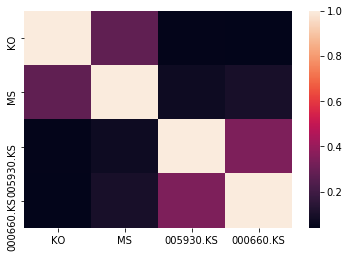

In [20]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)